In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# Required libraries imported in python

In [9]:
fn=pd.read_csv(r"C:\Users\rks91\OneDrive\Desktop\final\Project\HRAnalytics\HR Analytics(work)\final.csv")

# reading the csv file.

In [10]:
fn.shape # Shape of the combined file(staff ultz16-17 and staff ultz17-18)

(1111, 22)

In [11]:
fn.head(2)# check the first 2 rows of the data set

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,promotion,EMPLOYEE PRESENT IN BOTH YEAR,TENURE,Current Status
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,9/30/2000,NaN,4168,3666.5,1084.0,404.0,97.5,2623.5,74.0,29.56%,YES,0,18,Active
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,5/31/1999,NaN,4168,3750.0,1277.5,364.0,54.0,1294.5,1330.5,34.07%,NO,0,19,Active


In [12]:
name_num=fn[fn['Current Status']=='Active']

In [13]:
name_num.shape

(834, 22)

In [14]:
name_num=name_num.iloc[:,[0,2]]

In [15]:
name_num.head(2)

,Employee No,Employee Name
0,1,Rochette Jilleen
1,2,Daryl Natalina


In [16]:
name_num.shape

(834, 2)

In [11]:
# for column in fn.columns:
#     fn[column]=fn[column].replace({'-':np.nan})

# # replace all '-' with NaN.

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [17]:
fn.isnull().sum() # Finding null values.

Employee No                        0
Profit Center                      0
Employee Name                      0
Employee Position                  0
Employee Location                  0
People Group                       0
Employee Category                  0
Supervisor name                    0
Join Date                          0
Termination Date                 828
Total Hours                        0
Total Available Hours              0
Work Hours                         0
Leave Hours                        0
Training Hours                     0
BD Hours                           0
NC Hours                           0
Utilization%                       0
promotion                          0
EMPLOYEE PRESENT IN BOTH YEAR      0
TENURE                             0
Current Status                     0
dtype: int64

In [18]:
fn['Utilization%']=fn['Utilization%'].str.replace('%',' ') 

# removing % sign from utilization column

In [19]:
fn['Current Status'].replace({'Active':0,'Resigned':1},inplace=True)

# Conversion from categorical to numeric.

In [20]:
fn['Employee Position'].value_counts() 

# Employee position is a categorical ordinal variable so the values are coverted to numeric 
# considering the hierarcy of the level in the organization for client service staff and support staff

Level 7     360
Level 8     318
Level 6     233
Level 5     100
Level 4      49
Level 3      20
Level 2      11
No level      9
Level A2      3
Level A3      3
Level A1      2
Level 1       2
Level 10      1
Name: Employee Position, dtype: int64

In [21]:
fn['Employee Position'].replace({'Level 1':13,'Level 2':12,'Level 3':11,'Level 4':10,'Level 5':9,'Level 6':8,'Level 7':7,
                                 'Level 8':6,'Level 10':5,'Level A1':4,'Level A2':3,'Level A3':2,'No level':1},inplace=True)
# Replacing the levels with numeric value.

In [22]:
fn['Employee Position'].value_counts() # to confirm the employee number and level after converting to numeric.

7     360
6     318
8     233
9     100
10     49
11     20
12     11
1       9
3       3
2       3
13      2
4       2
5       1
Name: Employee Position, dtype: int64

In [23]:
fn['Current Status'].value_counts() # Check the counts after conversion to numeric

0    834
1    277
Name: Current Status, dtype: int64

In [24]:
fn.info() # To check which variables are object and numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Employee No                    1111 non-null   int64  
 1   Profit Center                  1111 non-null   object 
 2   Employee Name                  1111 non-null   object 
 3   Employee Position              1111 non-null   int64  
 4   Employee Location              1111 non-null   object 
 5   People Group                   1111 non-null   object 
 6   Employee Category              1111 non-null   object 
 7   Supervisor name                1111 non-null   object 
 8   Join Date                      1111 non-null   object 
 9   Termination Date               283 non-null    object 
 10  Total Hours                    1111 non-null   int64  
 11  Total Available Hours          1111 non-null   float64
 12  Work Hours                     1111 non-null   f

In [25]:
fn=fn.drop(['Termination Date'],axis=1) # column dropped due to more number of null values.

In [26]:
fn=fn.drop(['Employee Name'],axis=1) # column dropped because it is unique identifier

In [27]:
fn=fn.drop(['Employee No'],axis=1) #column dropped because it is unique identifier

In [28]:
fn['Utilization%']=fn['Utilization%'].astype(float)

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [109]:
fn[fn.select_dtypes(include=['object']).columns] = fn[fn.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [110]:
fn.head()

,Profit Center,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,promotion,EMPLOYEE PRESENT IN BOTH YEAR,TENURE,Current Status
0,0,13,2,0,8,57,110,4168,3666.5,1084.0,404.0,97.5,2623.5,74.0,29.56,1,0,18,0
1,3,12,6,0,8,57,70,4168,3750.0,1277.5,364.0,54.0,1294.5,1330.5,34.07,0,0,19,0
2,3,12,6,0,8,57,0,4168,3618.5,2177.5,482.0,67.5,970.5,907.0,60.18,0,0,17,0
3,4,12,0,0,7,57,110,3928,3491.5,546.0,404.0,32.5,2743.0,279.0,15.64,0,0,18,1
4,0,12,2,0,8,57,82,4168,3635.0,899.0,520.0,13.0,2657.0,731.0,24.73,0,0,16,0


# co-relation matrix

<AxesSubplot:>

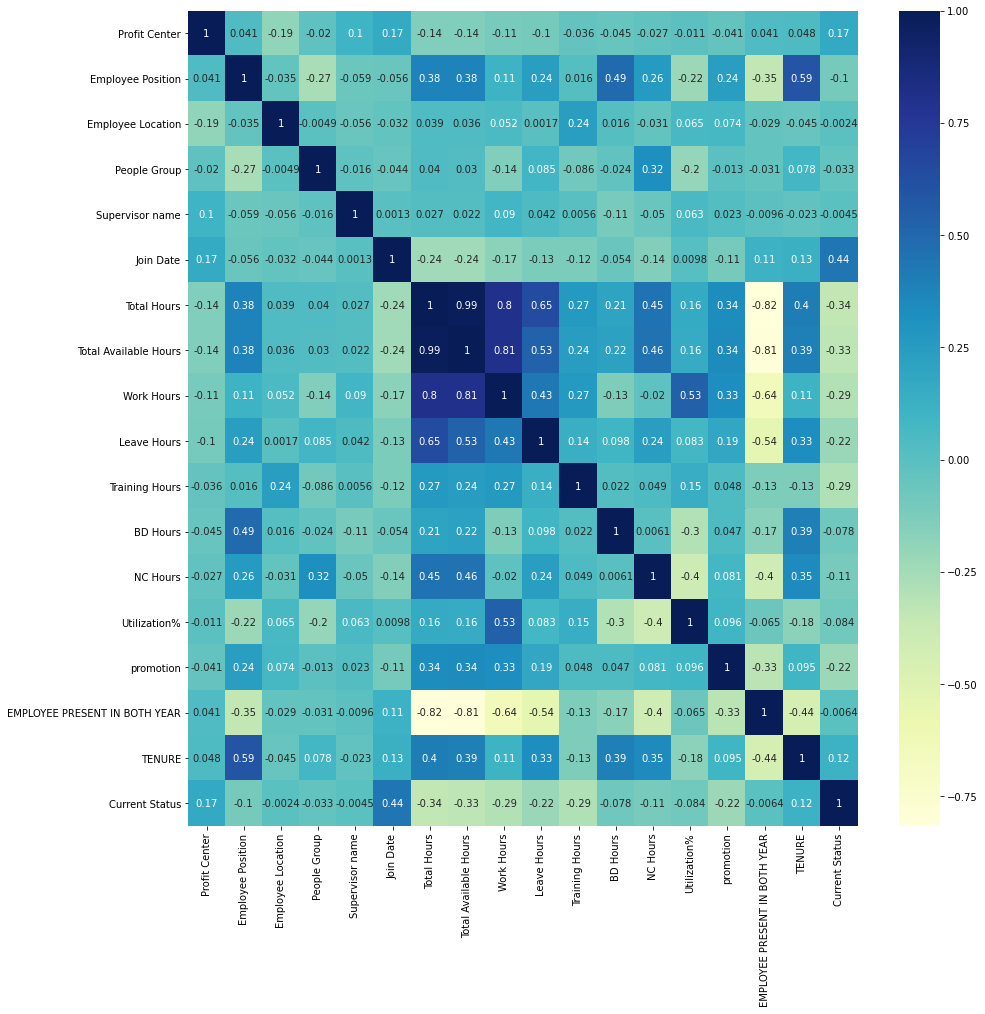

In [84]:
plt.figure(figsize=(15,15))
sns.heatmap(fn.corr(),annot=True,cmap='YlGnBu')

In [111]:
# dropping least important column based on feature selection

In [112]:
fn=fn.drop(['Employee Location'],axis=1) 

In [113]:
fn=fn.drop(['People Group'],axis=1)

In [114]:
fn=fn.drop(['BD Hours'],axis=1)

In [115]:
fn=fn.drop(['Utilization%'],axis=1)

In [116]:
fn=fn.drop(['Employee Category'],axis=1) proxy column of current status.

# class balancing

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
fn_train,fn_test=train_test_split(fn,test_size=.3,random_state=555)

In [119]:
fn_train['Current Status'].value_counts() 

0    588
1    189
Name: Current Status, dtype: int64

In [120]:
df_fn=fn_train[fn_train['Current Status']==1]

In [121]:
df_fn.shape

(189, 15)

In [122]:
fn_train=pd.concat([fn_train,df_fn])

In [123]:
fn_train['Current Status'].value_counts() 

0    588
1    378
Name: Current Status, dtype: int64

In [124]:
fn_train_x=fn_train.iloc[:,0:-1]
fn_train_y=fn_train.iloc[:,-1]

fn_test_x=fn_test.iloc[:,0:-1]
fn_test_y=fn_test.iloc[:,-1]

In [125]:
fn_train_x.shape

(966, 14)

In [126]:
fn_test_x.shape

(334, 14)

In [127]:
fn_test_y.shape

(334,)

In [128]:
fn_train_y.shape

(966,)

# Feature selection :CHI2 Test

In [46]:
fn_feature=pd.read_csv(r"E:\HRAnalytics\HR Analytics\FINAL.csv")

In [169]:
fn_feature.head(3)

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,promotion,EMPLOYEE PRESENT IN BOTH YEAR,TENURE,Current Status
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,9/30/2000,NaN,4168,3666.5,1084.0,404.0,97.5,2623.5,74.0,29.56%,YES,0,18,Active
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,5/31/1999,NaN,4168,3750.0,1277.5,364.0,54.0,1294.5,1330.5,34.07%,NO,0,19,Active
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,1/31/2001,NaN,4168,3618.5,2177.5,482.0,67.5,970.5,907.0,60.18%,NO,0,17,Active


In [170]:
for column in fn_feature.columns:
    fn_feature[column]=fn_feature[column].replace({'-':np.nan})

# replace all '-' with NaN.

In [171]:
fn_feature.isnull().sum() # Finding null values.

Employee No                        0
Profit Center                      0
Employee Name                      0
Employee Position                  0
Employee Location                  0
People Group                       0
Employee Category                  0
Supervisor name                    0
Join Date                          0
Termination Date                 834
Total Hours                        0
Total Available Hours              0
Work Hours                         0
Leave Hours                        0
Training Hours                     0
BD Hours                           0
NC Hours                           0
Utilization%                       0
promotion                          0
EMPLOYEE PRESENT IN BOTH YEAR      0
TENURE                             0
Current Status                     0
dtype: int64

In [172]:
fn_feature['Utilization%']=fn_feature['Utilization%'].str.replace('%',' ') 

# removing % sign from utilization column

In [173]:
fn_feature=fn_feature.drop(['Termination Date'],axis=1)

In [174]:
fn_feature['Utilization%']=fn_feature['Utilization%'].astype(float)

In [175]:
fn_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Employee No                    1111 non-null   int64  
 1   Profit Center                  1111 non-null   object 
 2   Employee Name                  1111 non-null   object 
 3   Employee Position              1111 non-null   object 
 4   Employee Location              1111 non-null   object 
 5   People Group                   1111 non-null   object 
 6   Employee Category              1111 non-null   object 
 7   Supervisor name                1111 non-null   object 
 8   Join Date                      1111 non-null   object 
 9   Total Hours                    1111 non-null   int64  
 10  Total Available Hours          1111 non-null   float64
 11  Work Hours                     1111 non-null   float64
 12  Leave Hours                    1111 non-null   f

In [176]:
fn_feature=fn_feature.drop(['Employee Name'],axis=1)

In [177]:
fn_feature=fn_feature.drop(['Employee No'],axis=1)

In [178]:
col_ob=fn_feature.select_dtypes(include=['object']).columns
col_ob

Index(['Profit Center', 'Employee Position', 'Employee Location',
       'People Group', 'Employee Category', 'Supervisor name', 'Join Date',
       'promotion', 'Current Status'],
      dtype='object')

In [179]:
col_num=fn_feature.select_dtypes(exclude=['object']).columns
col_num

Index(['Total Hours', 'Total Available Hours', 'Work Hours', 'Leave Hours',
       'Training Hours', 'BD Hours', 'NC Hours', 'Utilization%',
       'EMPLOYEE PRESENT IN BOTH YEAR', 'TENURE'],
      dtype='object')

In [111]:
#fn_feature[fn_feature.select_dtypes(include=['object']).columns] = fn_feature[fn_feature.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [181]:
fn_feature_x=fn_feature.iloc[:,[7,8,9,10,11,12,13,14,16,17]]

In [182]:
fn_feature_y=fn_feature.iloc[:,-1]

# automated program for chi square

In [109]:
def feature_selection(data_frame,target_variable):
    """
    this pgm takes data set in dataframe and Y variable as target variable.
    It runs the chi2 test on each variable and prints the result based on p value.
    """
    
    col_list = []
    p_value_col  = []
    for col in data_frame.select_dtypes(include=['object']).columns:
        
        abc=pd.crosstab(data_frame[col],data_frame[target_variable])
        from scipy.stats import chi2_contingency
        chiq_stat,p_value,DoF,exp_value=chi2_contingency(abc)
        
        
        col_list.append(col)
        p_value_col.append(p_value)
        
        if col == data_frame.select_dtypes(include=['object']).columns[-1]:
            global df
            df=pd.DataFrame({'Columns':col_list,'PValues':p_value_col})
            df=df.sort_values('PValues')
            df=df.iloc[1:,]
            df['Importance  ']=np.where(df['PValues']< 0.05,'Significant','Not-Significant')
            conditions=[df['PValues']<.001 , (df['PValues']>.001)&(df['PValues']<.01),(df['PValues']>.01)&(df['PValues']<.05)]
            values=["****","***","**"]
            df["Star"]=np.select(conditions,values)
            print("Check the DF. Cols at the top are more important AND cols at bottom are least important")
            print("----------------------------------------------------------------------------------------")
            print("----------------------------------------------------------------------------------------")
            print(df)
            print("----------------------------------------------------------------------------------------")
            print("----------------------------------------------------------------------------------------")
            print(" **** "," is most important ","  "," Followed by *** "," and then "," ** ")
            print("----------------------------------------------------------------------------------------")
            print("----------------------------------------------------------------------------------------")
            
            
                       
        

In [110]:
feature_selection(fn_feature,'Current Status')       

Check the DF. Cols at the top are more important AND cols at bottom are least important
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
             Columns        PValues     Importance    Star
4  Employee Category  6.683785e-200      Significant  ****
6          Join Date   4.872816e-35      Significant  ****
0      Profit Center   1.773452e-28      Significant  ****
7          promotion   2.677758e-13      Significant  ****
5    Supervisor name   2.068907e-11      Significant  ****
1  Employee Position   7.309334e-03      Significant   ***
2  Employee Location   1.746517e-01  Not-Significant     0
3       People Group   4.658114e-01  Not-Significant     0
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
 ****   is most important

# feature selection for numeric column

In [114]:
#RFE

In [187]:
def rfe_selection(data_frame,target_variable):
    from sklearn.feature_selection import RFE
    from sklearn.ensemble import RandomForestClassifier
    rfc=RandomForestClassifier()
    for i in range(1,len(data_frame.columns) +1):
        rfe=RFE(rfc,i)
        rfe.fit(data_frame,target_variable)
        global df1
        df1=pd.DataFrame({"cols":data_frame.columns,"Imp":rfe.support_})
        print("The",i,"most important feature are")
        print("-----------------------------------")
        print(df1)
        print("-----------------------------------")
    

In [188]:
rfe_selection(fn_feature_x,fn_feature_y)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


The 1 most important feature are
-----------------------------------
                            cols    Imp
0                    Total Hours  False
1          Total Available Hours   True
2                     Work Hours  False
3                    Leave Hours  False
4                 Training Hours  False
5                       BD Hours  False
6                       NC Hours  False
7                   Utilization%  False
8  EMPLOYEE PRESENT IN BOTH YEAR  False
9                         TENURE  False
-----------------------------------


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


The 2 most important feature are
-----------------------------------
                            cols    Imp
0                    Total Hours   True
1          Total Available Hours  False
2                     Work Hours  False
3                    Leave Hours  False
4                 Training Hours   True
5                       BD Hours  False
6                       NC Hours  False
7                   Utilization%  False
8  EMPLOYEE PRESENT IN BOTH YEAR  False
9                         TENURE  False
-----------------------------------


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


The 3 most important feature are
-----------------------------------
                            cols    Imp
0                    Total Hours   True
1          Total Available Hours  False
2                     Work Hours  False
3                    Leave Hours  False
4                 Training Hours   True
5                       BD Hours  False
6                       NC Hours  False
7                   Utilization%  False
8  EMPLOYEE PRESENT IN BOTH YEAR  False
9                         TENURE   True
-----------------------------------


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


The 4 most important feature are
-----------------------------------
                            cols    Imp
0                    Total Hours   True
1          Total Available Hours   True
2                     Work Hours  False
3                    Leave Hours  False
4                 Training Hours   True
5                       BD Hours  False
6                       NC Hours  False
7                   Utilization%  False
8  EMPLOYEE PRESENT IN BOTH YEAR  False
9                         TENURE   True
-----------------------------------


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


The 5 most important feature are
-----------------------------------
                            cols    Imp
0                    Total Hours   True
1          Total Available Hours   True
2                     Work Hours  False
3                    Leave Hours  False
4                 Training Hours   True
5                       BD Hours  False
6                       NC Hours  False
7                   Utilization%  False
8  EMPLOYEE PRESENT IN BOTH YEAR   True
9                         TENURE   True
-----------------------------------


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


The 6 most important feature are
-----------------------------------
                            cols    Imp
0                    Total Hours   True
1          Total Available Hours   True
2                     Work Hours   True
3                    Leave Hours  False
4                 Training Hours   True
5                       BD Hours  False
6                       NC Hours  False
7                   Utilization%  False
8  EMPLOYEE PRESENT IN BOTH YEAR   True
9                         TENURE   True
-----------------------------------


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


The 7 most important feature are
-----------------------------------
                            cols    Imp
0                    Total Hours   True
1          Total Available Hours   True
2                     Work Hours   True
3                    Leave Hours   True
4                 Training Hours   True
5                       BD Hours  False
6                       NC Hours  False
7                   Utilization%  False
8  EMPLOYEE PRESENT IN BOTH YEAR   True
9                         TENURE   True
-----------------------------------


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


The 8 most important feature are
-----------------------------------
                            cols    Imp
0                    Total Hours   True
1          Total Available Hours   True
2                     Work Hours   True
3                    Leave Hours   True
4                 Training Hours   True
5                       BD Hours  False
6                       NC Hours   True
7                   Utilization%  False
8  EMPLOYEE PRESENT IN BOTH YEAR   True
9                         TENURE   True
-----------------------------------


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


The 9 most important feature are
-----------------------------------
                            cols    Imp
0                    Total Hours   True
1          Total Available Hours   True
2                     Work Hours   True
3                    Leave Hours   True
4                 Training Hours   True
5                       BD Hours  False
6                       NC Hours   True
7                   Utilization%   True
8  EMPLOYEE PRESENT IN BOTH YEAR   True
9                         TENURE   True
-----------------------------------


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


The 10 most important feature are
-----------------------------------
                            cols   Imp
0                    Total Hours  True
1          Total Available Hours  True
2                     Work Hours  True
3                    Leave Hours  True
4                 Training Hours  True
5                       BD Hours  True
6                       NC Hours  True
7                   Utilization%  True
8  EMPLOYEE PRESENT IN BOTH YEAR  True
9                         TENURE  True
-----------------------------------


# model building -Random forest

In [129]:
from sklearn.ensemble import RandomForestClassifier
rfc_fn1=RandomForestClassifier()

In [130]:
rfc_fn1.fit(fn_train_x,fn_train_y)

RandomForestClassifier()

In [131]:
pred_fn1=rfc_fn1.predict(fn_test_x)

In [132]:
from sklearn.metrics import confusion_matrix

In [133]:
tab_rfc_fn1=confusion_matrix(pred_fn1,fn_test_y)
tab_rfc_fn1

array([[239,  13],
       [  7,  75]], dtype=int64)

In [134]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_fn1,fn_test_y) # accuracy for Random Forest

0.9401197604790419

In [135]:
from sklearn.metrics import precision_score
precision_score(fn_test_y,pred_fn1) # Precision score for Random Forest

0.9146341463414634

In [136]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [137]:
log_roc_auc_fn1=roc_auc_score(fn_test_y,pred_fn1)
log_roc_auc_fn1    
# auroc score for Random Forest.

0.9119087213599408

# testing on active employee

In [138]:
df1_active=fn[fn['Current Status']==0]
df1_active

,Profit Center,Employee Position,Supervisor name,Join Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,NC Hours,Utilization%,promotion,EMPLOYEE PRESENT IN BOTH YEAR,TENURE,Current Status
0,0,13,57,110,4168,3666.50,1084.00,404.0,97.50,74.00,29.56,1,0,18,0
1,3,12,57,70,4168,3750.00,1277.50,364.0,54.00,1330.50,34.07,0,0,19,0
2,3,12,57,0,4168,3618.50,2177.50,482.0,67.50,907.00,60.18,0,0,17,0
4,0,12,57,82,4168,3635.00,899.00,520.0,13.00,731.00,24.73,0,0,16,0
5,0,11,127,92,4168,3481.00,645.00,582.0,105.00,407.00,18.53,0,0,14,0
6,3,11,8,111,4168,3604.00,796.68,560.0,14.00,352.00,22.11,0,0,14,0
7,4,12,18,12,4168,3772.00,554.00,388.0,8.00,700.00,14.69,1,0,14,0
8,4,12,127,19,4168,3730.00,2860.00,380.0,58.00,531.00,76.68,0,0,14,0
9,4,12,57,32,4168,3642.00,501.00,408.0,118.00,1856.50,13.76,0,0,14,0
10,4,12,57,42,4168,3782.00,722.00,384.0,2.00,1273.00,19.09,0,0,13,0


In [139]:
df1_active.shape

(834, 15)

In [140]:
df1_active=df1_active.drop(['Current Status'],axis=1)

In [141]:
pred_active1=rfc_fn1.predict(df1_active)
pred_active1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [142]:
resigned_rf1=pd.DataFrame({'Number':name_num['Employee No'],'Name':name_num['Employee Name'],'predicted_value':pred_active1})
resigned_rf1

,Number,Name,predicted_value
0,1,Rochette Jilleen,0
1,2,Daryl Natalina,0
2,3,Annnora Gabrielle,0
4,6,Jordanna Danya,0
5,7,Irene Candis,0
6,9,Marleah Bernadina,0
7,10,Guenevere Florida,0
8,12,Revkah Stephie,0
9,13,Cacilia Aimee,0
10,14,Tallia Eyde,0


In [143]:
emp_leaving_rf1=resigned_rf1[resigned_rf1['predicted_value']==1]
emp_leaving_rf1

,Number,Name,predicted_value
39,46,Kirsti Vikky,1
584,722,Alta Adaline,1
838,977,Ella Roth,1
970,1109,Robinia Adoree,1
982,62,Madella Ann-Marie,1
1018,213,Brit Karoline,1
1070,433,Nanete Kandace,1


In [144]:
# decision tree

In [145]:
from sklearn.tree import DecisionTreeClassifier
dt_fn1 = DecisionTreeClassifier( criterion = "entropy " , max_depth = 7 , min_samples_split = 40)

In [146]:
dt_fn1=DecisionTreeClassifier(criterion = "entropy" , max_depth = 7 , min_samples_split = 40)

# criterion,max_depth and min_samples_split was optimized using grid search

In [147]:
dt_fn1.fit(fn_train_x,fn_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=40)

In [148]:
pred_dt1=dt_fn1.predict(fn_test_x)

In [149]:
tab_dt_fn1=confusion_matrix(pred_dt1,fn_test_y)
tab_dt_fn1

array([[237,  18],
       [  9,  70]], dtype=int64)

In [150]:
accuracy_score(pred_dt1,fn_test_y) # accuracy for Decision tree

0.9191616766467066

In [151]:
precision_score(fn_test_y,pred_dt1) # precision for Decision tree

0.8860759493670886

In [152]:
log_roc_auc_fndt=roc_auc_score(fn_test_y,pred_dt1)
log_roc_auc_fndt 
# auroc score for Decision tree

0.8794345898004434

In [153]:
# prediction on active employee.

In [154]:
pred_ac_dt=dt_fn1.predict(df1_active)
pred_ac_dt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [155]:
resign_dt1=pd.DataFrame({'Number':name_num['Employee No'],'Name':name_num['Employee Name'],'predicted_value':pred_ac_dt})
resign_dt1

,Number,Name,predicted_value
0,1,Rochette Jilleen,0
1,2,Daryl Natalina,0
2,3,Annnora Gabrielle,0
4,6,Jordanna Danya,0
5,7,Irene Candis,0
6,9,Marleah Bernadina,0
7,10,Guenevere Florida,0
8,12,Revkah Stephie,0
9,13,Cacilia Aimee,0
10,14,Tallia Eyde,0


In [156]:
emp_leaving_dt1=resign_dt1[resign_dt1['predicted_value']==1]
emp_leaving_dt1

,Number,Name,predicted_value
39,46,Kirsti Vikky,1
70,84,Kary Mindy,1
98,124,Stacey Cassey,1
147,187,Kali Gwendolyn,1
462,585,Morganica Nanny,1
572,710,Loella Constancia,1
658,797,Lani Rubalcaba,1
659,798,Bell Stoffel,1
817,956,Luke Garner,1
833,972,Tori Montoya,1


In [157]:
emp_leaving_dt1.shape

(17, 3)

In [158]:
# logistic Regression

In [159]:
from sklearn.linear_model import LogisticRegression
logreg_fn1=LogisticRegression()

In [160]:
logreg_fn1.fit(fn_train_x,fn_train_y)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [161]:
pred_log_fn1=logreg_fn1.predict(fn_test_x)
pred_log_fn1

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [162]:
tab_log_fn1=confusion_matrix(pred_log_fn1,fn_test_y)
tab_log_fn1

array([[234,  31],
       [ 12,  57]], dtype=int64)

In [163]:
accuracy_score(pred_log_fn1,fn_test_y) # accuracy for Logistic regression

0.8712574850299402

In [164]:
precision_score(fn_test_y,pred_log_fn1) # precision for Logistic regression

0.8260869565217391

In [165]:
log_roc_auc_fn1=roc_auc_score(fn_test_y,pred_log_fn1)
log_roc_auc_fn1

0.7994733924611972

In [166]:
# prediction on active empolyee

In [167]:
pred_ac_log=logreg_fn1.predict(df1_active)
pred_ac_log

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [168]:
resign_log1=pd.DataFrame({'Number':name_num['Employee No'],'Name':name_num['Employee Name'],'predicted_value':pred_ac_log})
resign_log1

,Number,Name,predicted_value
0,1,Rochette Jilleen,1
1,2,Daryl Natalina,1
2,3,Annnora Gabrielle,0
4,6,Jordanna Danya,1
5,7,Irene Candis,0
6,9,Marleah Bernadina,1
7,10,Guenevere Florida,0
8,12,Revkah Stephie,0
9,13,Cacilia Aimee,0
10,14,Tallia Eyde,0


In [169]:
emp_leaving_log1=resign_log1[resign_log1['predicted_value']==1]
emp_leaving_log1

,Number,Name,predicted_value
0,1,Rochette Jilleen,1
1,2,Daryl Natalina,1
4,6,Jordanna Danya,1
6,9,Marleah Bernadina,1
15,20,Leonanie Lexine,1
26,31,Nikolia Shirl,1
29,34,Beverlee Giana,1
32,38,Genvieve Celeste,1
33,39,Kim Consuela,1
34,40,Nerissa Jackquelin,1


In [170]:
emp_leaving_log1.shape

(55, 3)